In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

#读取数据
df=pd.read_csv("File_Classify.csv",encoding="gbk")
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(df)
constant_columns=[column for column in df.columns
                  if column not in df.columns[constant_filter.get_support()]]
df.drop(labels=constant_columns,axis=1,inplace=True)

# 数据预处理
ss = MinMaxScaler()
ss.fit(df)
df = pd.DataFrame(ss.transform(df))
df=df[df.columns[1:]]
#制作数据集
traindate=[]
target=[]
for i in range(6,df.shape[0]):
    tmp=[]
    for j in range(i-6,i):
        tmp.append(list(df.loc[j]))
    
    traindate.append(tmp)
    target.append(list(df.loc[i]))

traindate=np.array(traindate)
target=np.array(target)

print('train.shape:',traindate.shape)
print('target.shape:',target.shape)

X_train,X_test,y_train,y_test=train_test_split(traindate,target,test_size=0.2,random_state=165)


train.shape: (32672, 6, 4)
target.shape: (32672, 4)


32672/32672 [==============================] - 6s 187us/sample - loss: 3.0572e-04 - mean_absolute_error: 0.0091 - mean_squared_error: 3.0572e-04
0.01838352909269224
0.03238756864320082
0.04347836754517574
0.029522161537956497
0 条数据


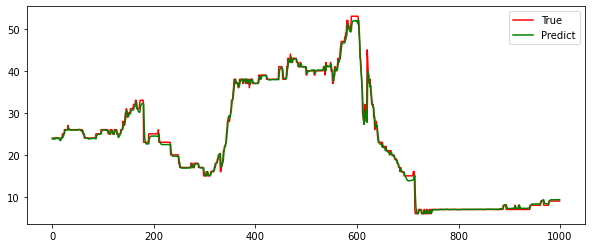

1 条数据


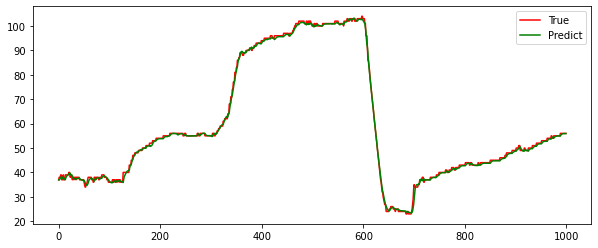

2 条数据


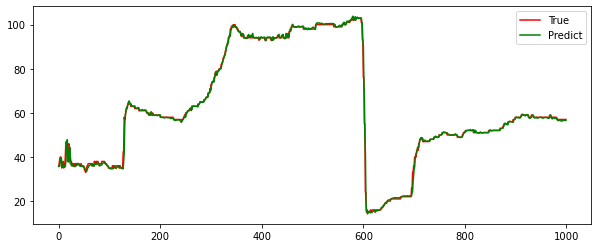

3 条数据


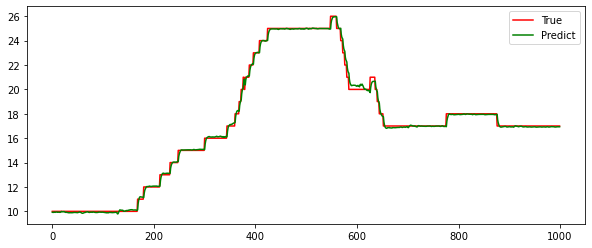

In [3]:
## your test_data 
'''
2020.09.06 修改过
'''
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error

df = pd.read_csv('File_Classify.csv', encoding="gbk")
#df2=pd.read_csv('data.csv',encoding="gbk")
#df = pd.read_csv('abnormal_data.csv',encoding="gbk")
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(df)
constant_columns=[column for column in df.columns
                  if column not in df.columns[constant_filter.get_support()]]
df.drop(labels=constant_columns,axis=1,inplace=True)

df1=df[df.columns[1:]]     #数据集 包括 时间间隔的
#df1=df                      #数据集 没有 时间间隔的
ss=MinMaxScaler()
ss.fit(df1)
#ss.fit(df2)
df1 = pd.DataFrame(ss.transform(df1))
#df2= pd.DataFrame(ss.transform(df2))

traindate=[]
target=[]
for i in range(6,df1.shape[0]):
    tmp=[]
    #tmp2=[]
    for j in range(i-6,i):
        tmp.append(list(df1.loc[j]))
        #tmp2.append(list(df2.loc[j]))
    
    traindate.append(tmp)
    target.append(list(df1.loc[i]))

traindate=np.array(traindate)
target=np.array(target)

X_test = traindate
y_test = target

from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

#model_new=load_model("File_Classify.hdf5")  # 实验所提方法的最佳模型
model_new=load_model("last_1.hdf5")
model_2=load_model("File_test.hdf5")       # Conv+Bilstm
model_3=load_model("last_4.hdf5")

#model_3=load_model("last_1.hdf5")         #BiLstm+Atten
#model_4=load_model("test_4.hdf5")
model_4=load_model("last_3.hdf5")

model_new.evaluate(X_test, y_test)  #计算测试集的val_loss

model_2.evaluate(X_test,y_test)
model_3.evaluate(X_test,y_test)
model_4.evaluate(X_test,y_test)

y_pre=np.squeeze(model_new.predict( X_test))


y_2=np.squeeze(model_2.predict(X_test))
y_3=np.squeeze(model_3.predict(X_test))
y_4=np.squeeze(model_4.predict(X_test))

y_pre = ss.inverse_transform(y_pre)

y_2= ss.inverse_transform(y_2)
y_3=ss.inverse_transform(y_3)
y_4=ss.inverse_transform(y_4)

y_test = ss.inverse_transform(y_test)

def MAPE(true, pred):
    diff = np.abs(np.array(true) - np.array(pred))
    return np.mean(diff / true)

print(MAPE(y_test,y_pre))
print(MAPE(y_test,y_2))
print(MAPE(y_test,y_3))
print(MAPE(y_test,y_4))

'''
print(np.sqrt(mean_squared_error(y_pre,y_test)))
print(np.sqrt(mean_squared_error(y_2,y_test)))
print(np.sqrt(mean_squared_error(y_3,y_test)))
print(np.sqrt(mean_squared_error(y_4,y_test)))
'''

for i in range(4):
    print (i,"条数据")
    plt.figure(figsize=(10,4))
    plt.plot(y_test[:,i][1500:2500], c='red',label='True')
    plt.plot(y_pre[:,i][1500:2500], c='g',label='Predict')
    '''
    plt.plot(y_2[:,i][:2000], c='yellow',label='Conv+BiLstm')
    plt.plot(y_3[:,i][:2000], c='blue',label='BiLstm+Atten')
    plt.plot(y_4[:,i][:2000], c='orange',label='Lstm+Lstm')
    '''
    #path=str(i)+'_260.png'
    #plt.savefig(path)
    plt.legend()
    #path=str(i)+'_final_260.svg'
    #plt.savefig(path,format='svg')
    plt.show()
    plt.close()


In [5]:
print(1.2288e-04)
print(3.4037e-04)
print(4.7019e-04)
print(3.0572e-04)

0.00012288
0.00034037
0.00047019
0.00030572


In [2]:
## your test_data
df = pd.read_csv('1.csv', encoding="gbk")
# constant_filter = VarianceThreshold(threshold=0)
# constant_filter.fit(df)
# constant_columns=[column for column in df.columns
#                   if column not in df.columns[constant_filter.get_support()]]
df.drop(labels=['byte5', 'byte4'],axis=1,inplace=True)

df = pd.DataFrame(ss.transform(df))

traindate=[]
target=[]
for i in range(6,df.shape[0]):
    tmp=[]
    for j in range(i-6,i):
        tmp.append(list(df.loc[j]))
    
    traindate.append(tmp)
    target.append(list(df.loc[i]))

traindate=np.array(traindate)
target=np.array(target)

X_test = traindate
y_testt = target

from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error

model_new=load_model("filter(1).hdf5")  #加载最好的模型
model_new.evaluate( X_test, y_testt)  #计算测试集的val_loss
y_pre=np.squeeze(model_new.predict( X_test))

y_pre = ss.inverse_transform([y_pre])
y_testt = ss.inverse_transform(y_testt)

loss=mean_squared_error(y_pre,y_testt)

a = list(y_pre[0][:3])
a.extend([48.0, 2.0])
a.extend(list(y_pre[0][3:]))

b = list(y_testt[0][:3])
b.extend([48.0, 2.0])
b.extend(list(y_testt[0][3:]))

print('true:', b)
print('predict:', a)
print('loss',loss)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1/1 [==============================] - 0s 266ms/sample - loss: 1.0934e-04 - mean_absolute_error: 0.0070 - mean_squared_error: 1.0934e-04
true: [31.0, 42.0, 42.99999999999999, 48.0, 2.0, 144.0, 111.0, 36.0]
predict: [30.705786943435672, 41.719460934400566, 42.0373529791832, 48.0, 2.0, 145.0, 110.79576301574707, 36.655220061540604]
loss 0.42716314190829746


6535/6535 [==============================] - 3s 486us/sample - loss: 6.9153e-04 - mean_absolute_error: 0.0127 - mean_squared_error: 6.9153e-04
0 条数据


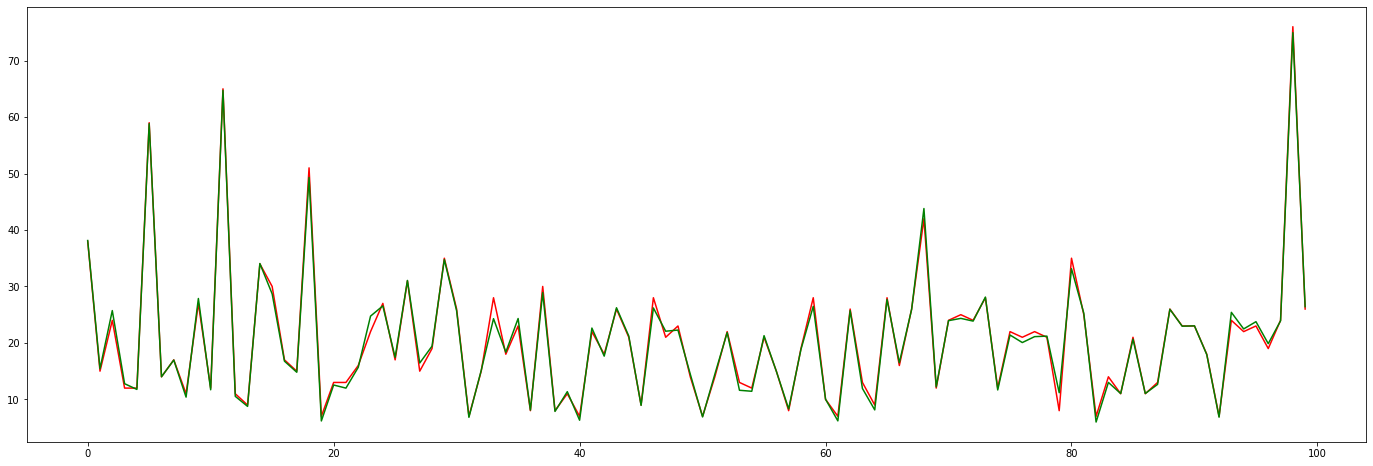

1 条数据


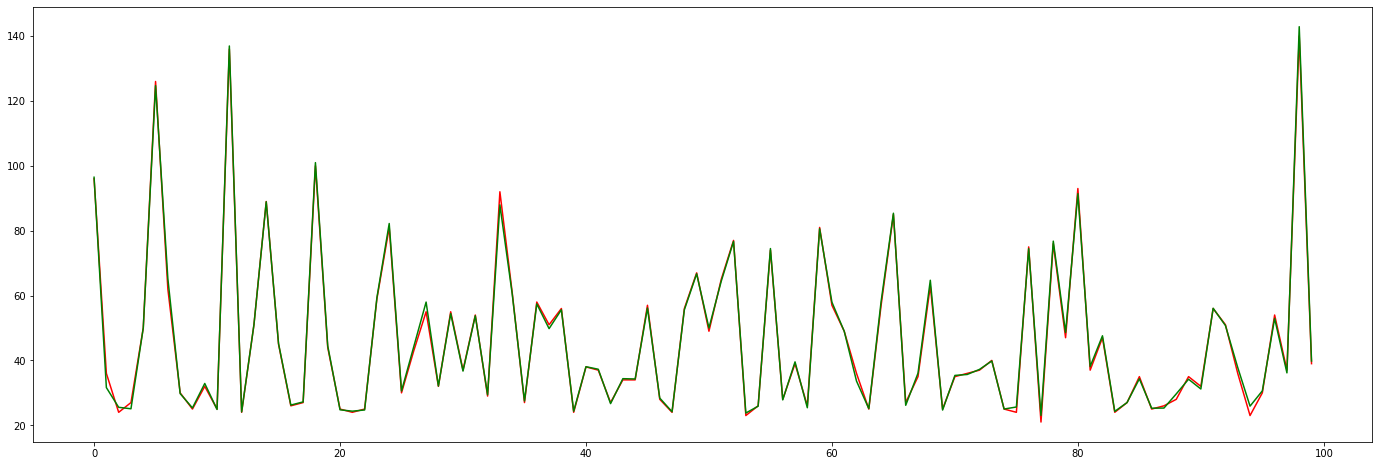

2 条数据


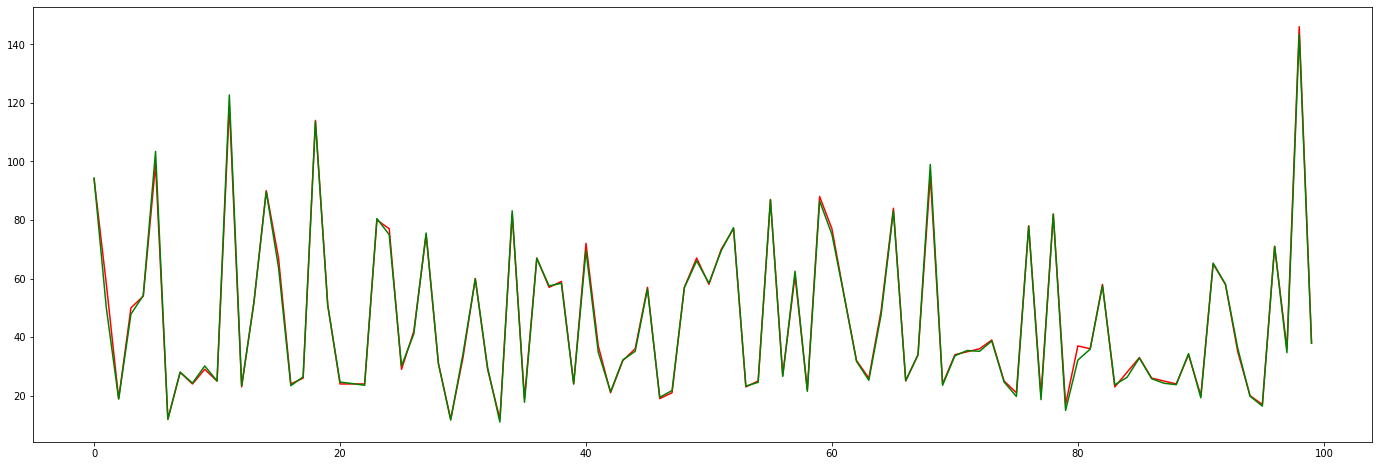

3 条数据


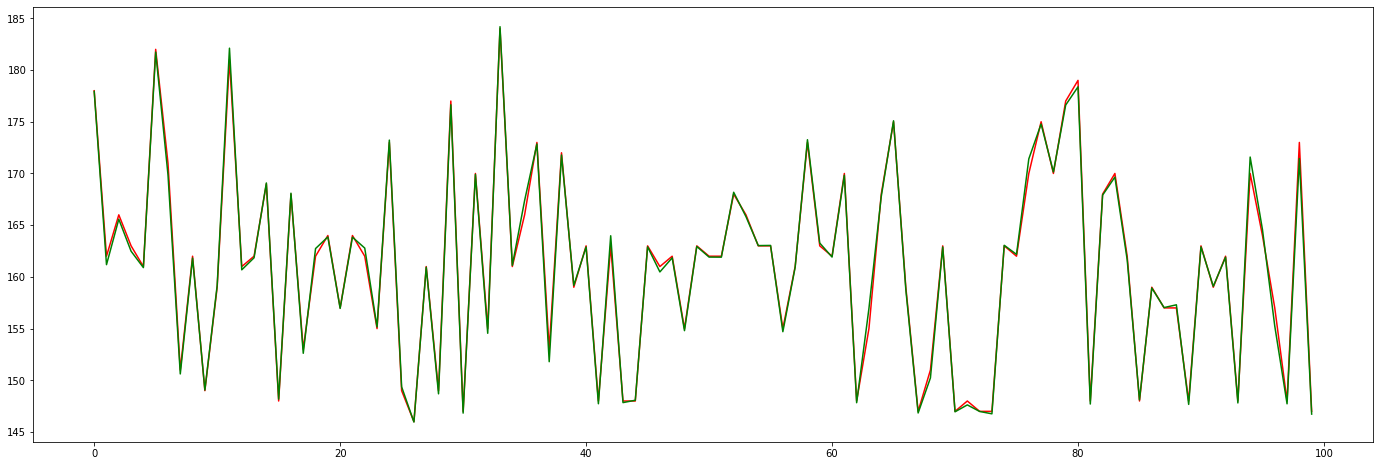

4 条数据


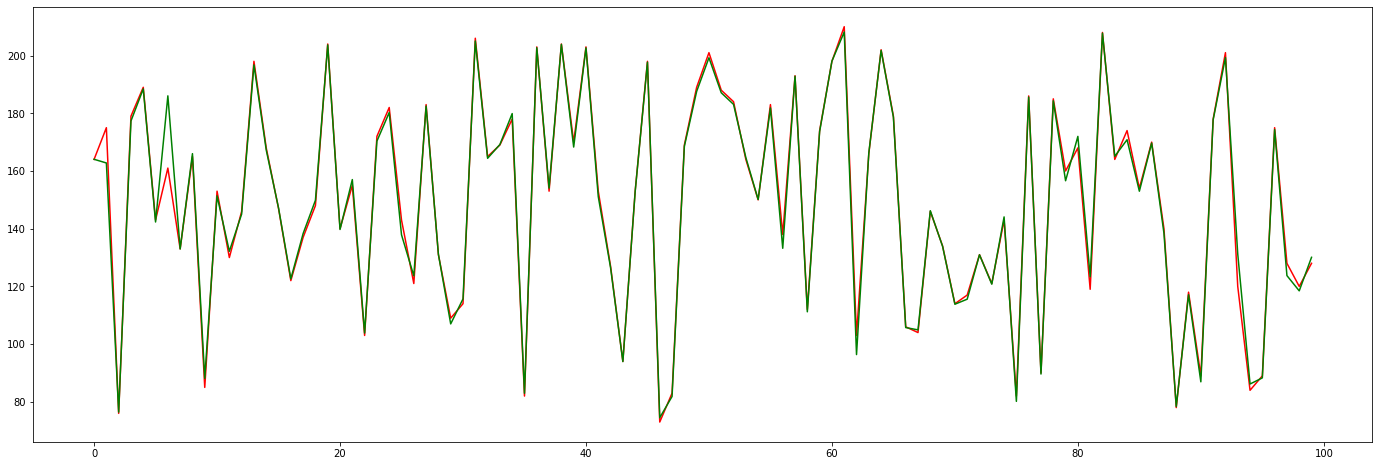

5 条数据


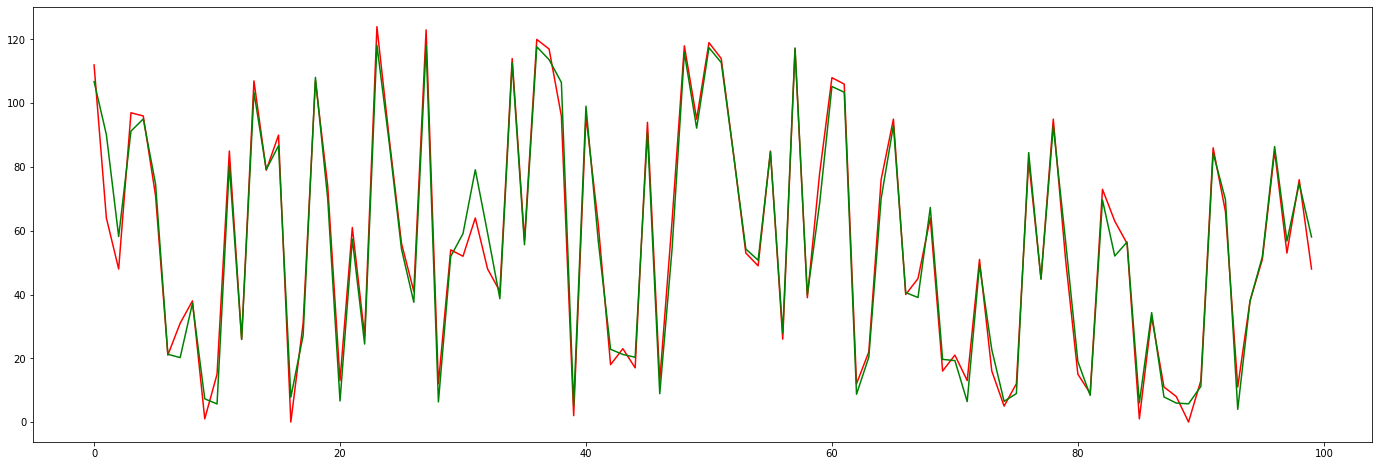

"plt.figure(figsize=(24,8))\nplt.plot(y_test[:,0][15:60], c='red')\nplt.plot(y_pre[15:60], c='g')\nplt.show()\nplt.close()"

In [58]:
# Test
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

model_new=load_model("filter.hdf5")  #加载最好的模型
model_new.evaluate( X_test, y_test)  #计算测试集的val_loss
y_pre=np.squeeze(model_new.predict( X_test))

y_pre = ss.inverse_transform(y_pre)
y_testt = ss.inverse_transform(y_test)
for i in range(6):
    print (i,"条数据")
    plt.figure(figsize=(24,8))
    plt.plot(y_testt[:,i][:100], c='red')
    plt.plot(y_pre[:,i][:100], c='g')
    plt.show()
    plt.close()

'''plt.figure(figsize=(24,8))
plt.plot(y_test[:,0][15:60], c='red')
plt.plot(y_pre[15:60], c='g')
plt.show()
plt.close()'''

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 6, 6)]       0                                            
__________________________________________________________________________________________________
bidirectional_9 (Bidirectional) (None, 6, 96)        21120       input_10[0][0]                   
__________________________________________________________________________________________________
permute_9 (Permute)             (None, 96, 6)        0           bidirectional_9[0][0]            
__________________________________________________________________________________________________
reshape_9 (Reshape)             (None, 96, 6)        0           permute_9[0][0]                  
____________________________________________________________________________________________

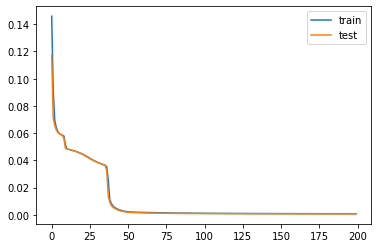

In [57]:
#模型训练
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import *
import numpy as np
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

def attention_3d_block(inputs):
    
    input_dim = int(inputs.shape[2]) 
    a = Permute((2, 1))(inputs)           #将 timesteps 与 input_dim 维对换 
    a = Reshape((input_dim, X_train.shape[1]))(a)  
    a = Dense(X_train.shape[1], activation='softmax')(a)
    a_probs = Permute((2, 1), name='attention_vec')(a)
    output_attention_mul = Multiply()([inputs, a_probs])
    return output_attention_mul


'''定义当误差为最小时保存最优模型，patience=1111,1111个epoch损失都没有下降就提前停止
monitor为观测值也就是val_loss，mode='min'代表最小的val_loss'''

callbacks = [EarlyStopping(monitor='val_loss', verbose=1, patience=1111),
			 ModelCheckpoint("filter.hdf5", monitor='val_mean_absolute_error',
							 mode='min', verbose=0, save_best_only=True)]   

inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))    # 6x9
context1 = Bidirectional(LSTM(48, return_sequences=True))(inputs)  #lstm神经元数量为48个 激活函数为relu
atten = attention_3d_block(context1)
drop = Dropout(0.2)(atten)
atten = Flatten()(drop)
x = Dense(48, activation='relu')(atten)
x = Dense(32, activation='relu')(x)
x = Dense(12, activation='relu')(x)

output = Dense(target.shape[1], activation='relu')(x)
model = Model(inputs=[inputs ], outputs=output)

model.compile(loss='mean_squared_error', optimizer='adam',metrics =['mae','mse'])
model.summary()  


history = model.fit(X_train, y_train, epochs=200, batch_size=2000, callbacks=callbacks,validation_data=( X_test, y_test), verbose=1)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()